In [9]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
%matplotlib inline
from image_reader_writer import ImageReaderWriter 

In [21]:
output_path = '/home/rmoreta/Projects/PectoralisSegmentation/Results/output.nrrd'
CT_path = '/home/rmoreta/Projects/PectoralisSegmentation/Data/output.nrrd'
image_nrrd = sitk.ReadImage(output_path)
image = sitk.GetArrayFromImage(image_nrrd)

In [10]:
irw = ImageReaderWriter()

In [15]:
image_2,metainfo = irw.read_in_numpy('/home/rmoreta/Projects/PectoralisSegmentation/Data/ProjectData_clean/Cont_1_clean.nrrd')

In [18]:
image_2 = image_2.transpose([2,1,0])

In [4]:
np.unique(image)

array([     0.,  13335.,  13336.,  13591.,  13592.,  17943.,  17944.])

In [6]:
np.where(image==13335)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

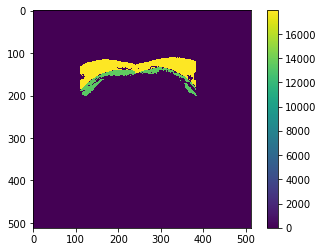

In [22]:
plt.figure()
plt.imshow(image[1])
plt.colorbar()
plt.show()

----------------------

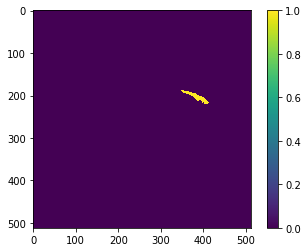

In [69]:
plt.figure()
plt.imshow(image[0,:,:,1])
plt.colorbar()
plt.show()

In [77]:
condition = image[0,:,:,1:5]==1
where_ones = np.where(condition)
where_ones = np.array(where_ones)
y_axis_min = where_ones[1].min()
y_axis_max = where_ones[1].max()

In [96]:
y_range = range(y_axis_min, y_axis_max)
x_axis_max = list()

for i in y_range:
    condition = image[0,:,i,1:5]==1
    where_ones = np.where(condition)
    where_ones = np.array(where_ones)
    if condition.sum() == 0:
        x_axis_max.append(x_axis_max[-2])
    else:
        x_axis_max.append(where_ones[0].max())

In [97]:
y_way = range(y_axis_min) + range(y_axis_max,512)

In [110]:
index_to0_fat_y = np.ix_(range(512),y_way)


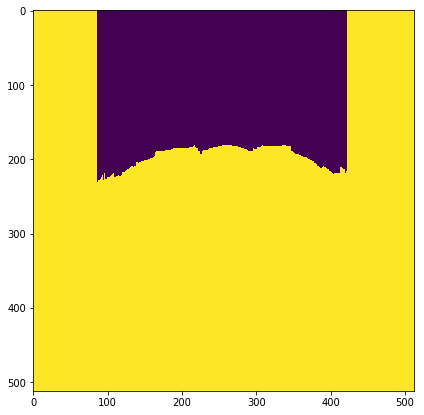

In [129]:
image_0 = np.zeros((512,512))
for i,val in enumerate(x_axis_max):
    index_to0_fat_x = np.ix_(range(val,512),[y_range[i]])
    image_0[index_to0_fat_x] = 1
image_0[index_to0_fat_y] = 1
plt.figure(figsize = (7,7))
plt.imshow(image_0)